# Compare the Argo data obtained from different sources

In [5]:
using NCDatasets
using PyPlot
const plt = PyPlot
using PyCall
mpl = pyimport("matplotlib")
mpl.style.use("fairease.mplstyle")

1st file is obtained using `pyargo` Python toolbox.     
2nd one is obtained using `beacon`.

In [11]:
datafile1 = "../data/Argo/argo_data.nc"
datafile2 = "../data/NorthAdriatic/NorthAdriaticSea_Euro-Argo_TEMP_19500101-20240101_0-500m.nc"

"../data/NorthAdriatic/NorthAdriaticSea_Euro-Argo_TEMP_19500101-20240101_0-500m.nc"

In [27]:
function plot_data_argo(datafile::AbstractString, figtitle::String)
    NCDataset(datafile, "r") do nc
        # print(nc)
        lat = nc["LATITUDE"][:]
        lon = nc["LONGITUDE"][:]
        dates = nc["TIME"][:]
        T = nc["TEMP"][:]
        S = nc["PSAL"][:]

        @info(extrema(dates))
        @info(extrema(lon))
        @info(extrema(lat))

        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(lon, lat, "ko", ms=2)
        ax.set_title("$(figtitle)\n$(length(lon)) data points")
        plt.show()
        
        return lon, lat, T, S
    end
end

plot_data_argo (generic function with 2 methods)

[ Info: (Dates.DateTime("2010-03-30T11:32:44"), Dates.DateTime("2024-01-18T14:17:20"))
[ Info: (13.09071, 15.745971666666666)
[ Info: (43.000303333333335, 45.65294333333333)


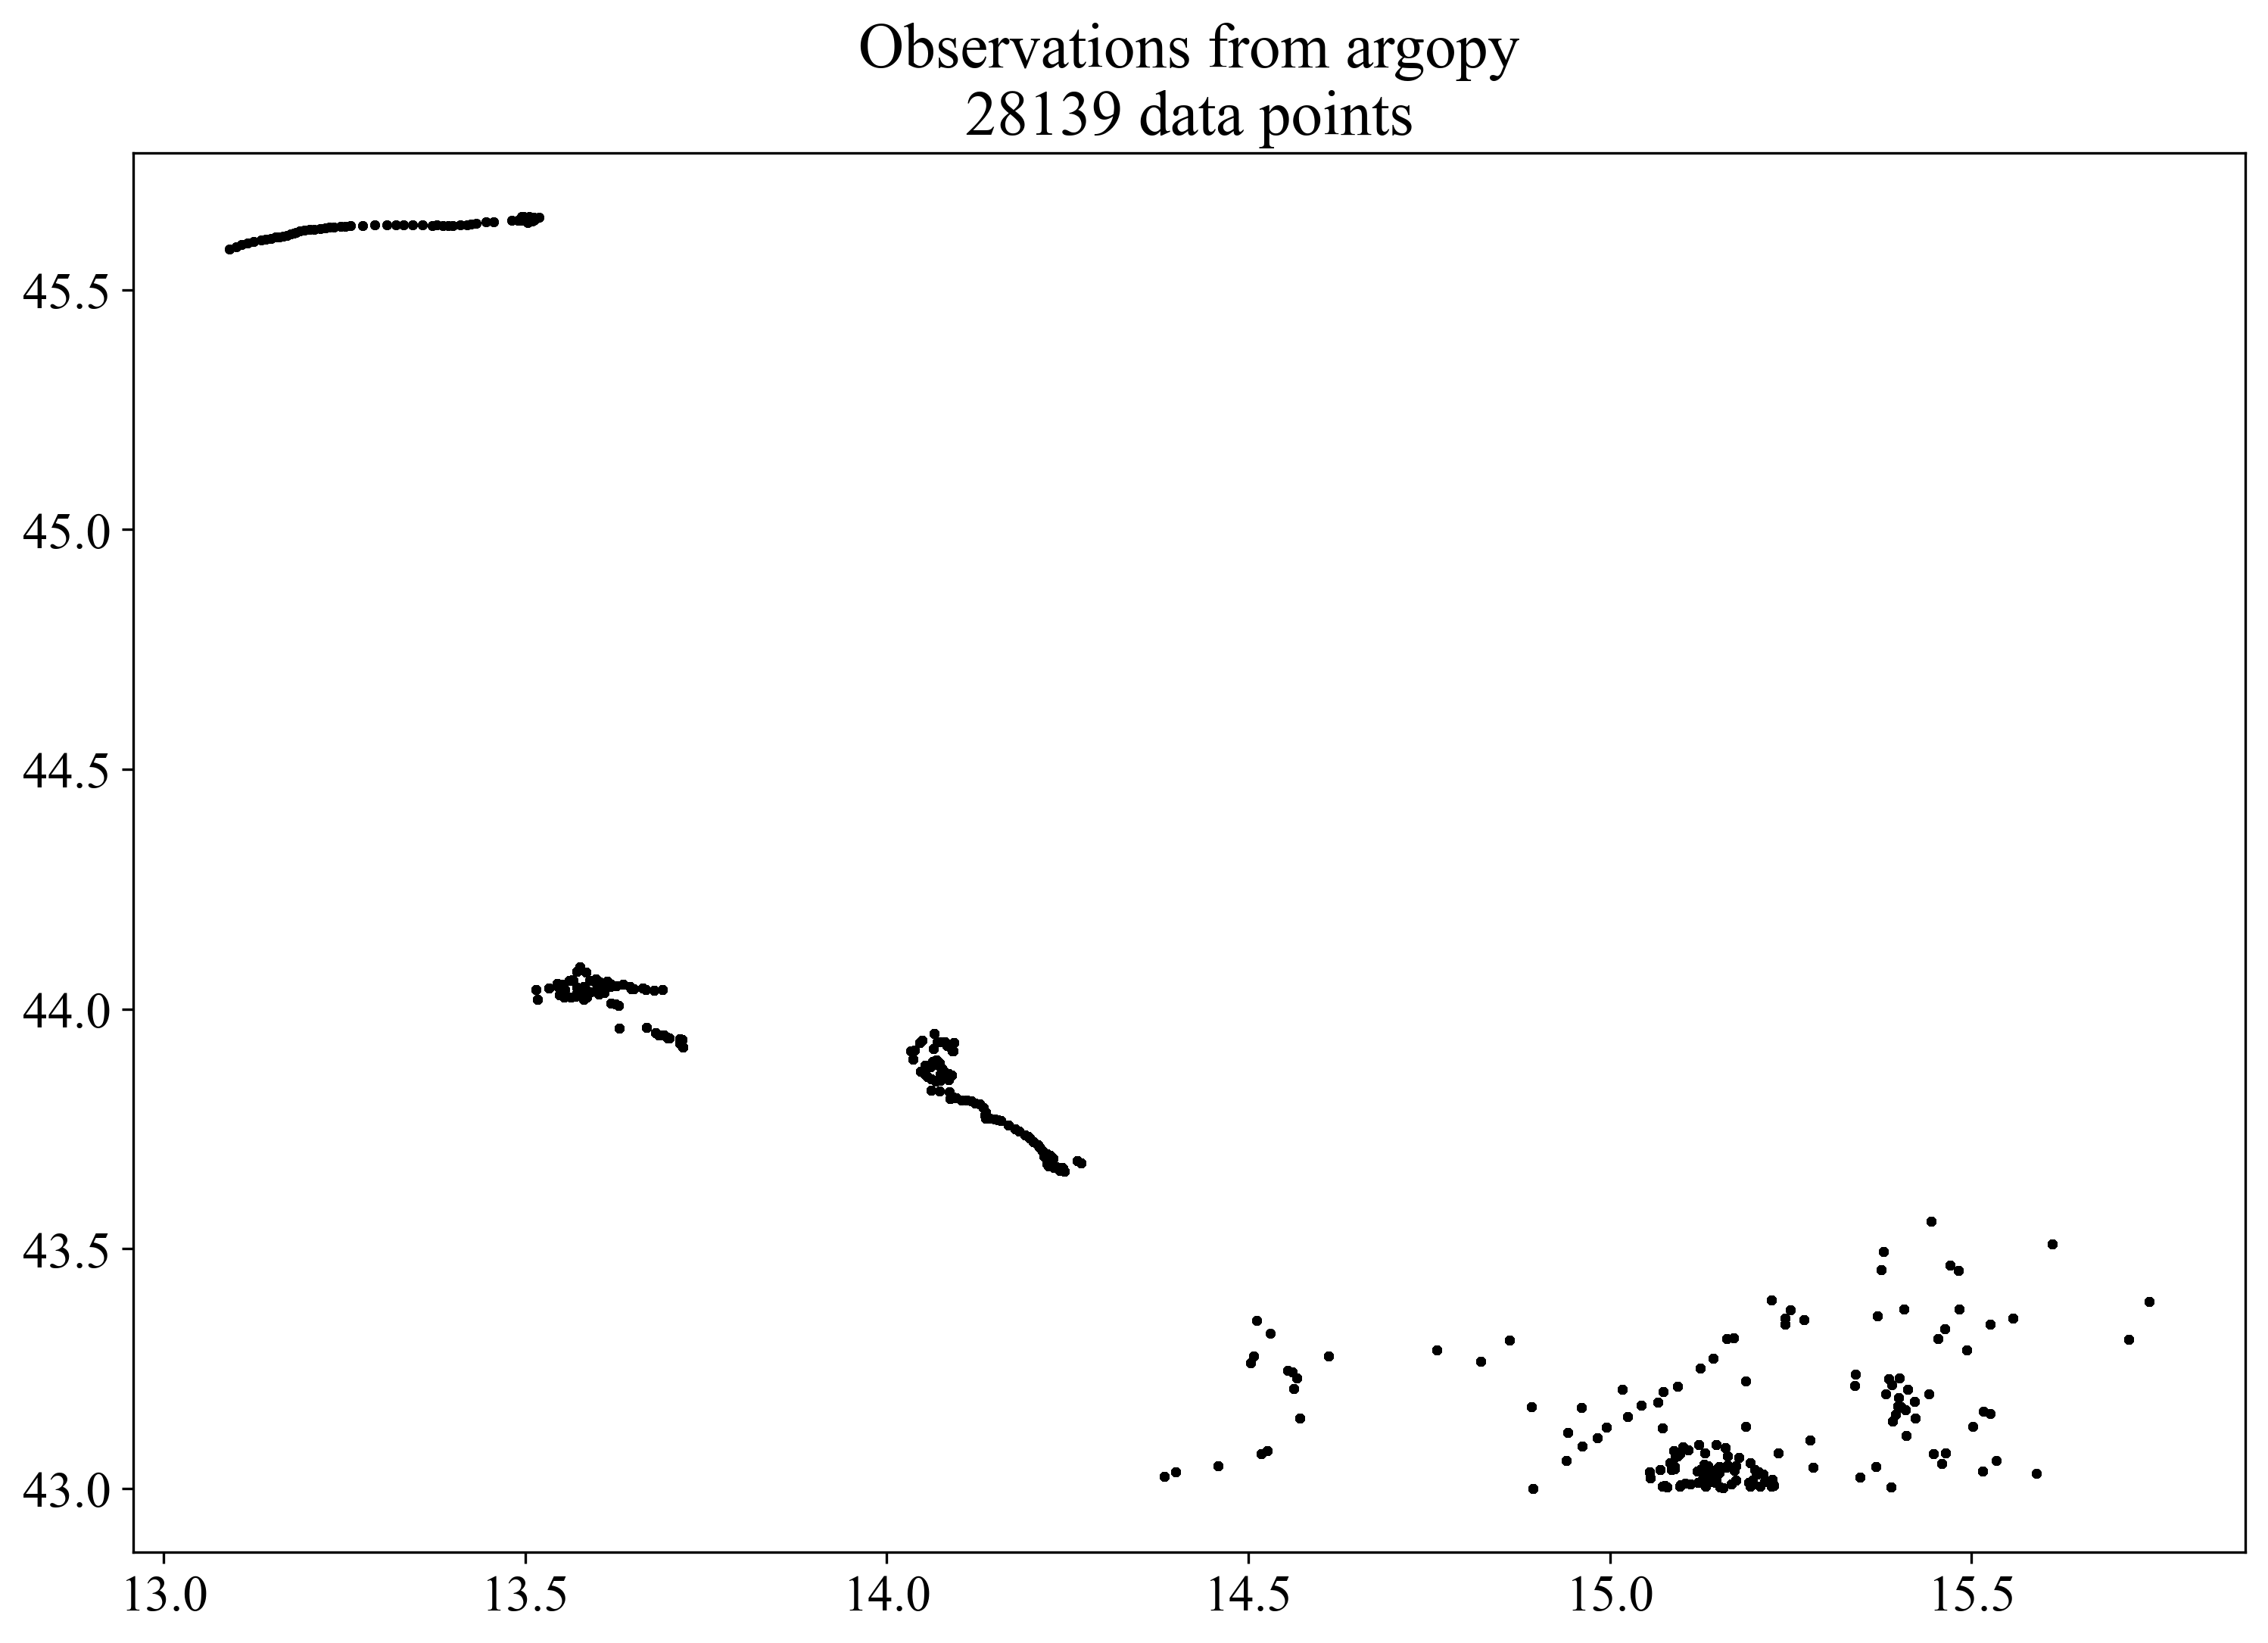

(Union{Missing, Float64}[15.39, 15.39, 15.39, 15.39, 15.39, 15.39, 15.39, 15.39, 15.39, 15.39  …  14.065258749999998, 14.065258749999998, 14.065258749999998, 14.065258749999998, 14.065258749999998, 14.065258749999998, 14.065258749999998, 14.065258749999998, 14.065258749999998, 14.065258749999998], Union{Missing, Float64}[43.217, 43.217, 43.217, 43.217, 43.217, 43.217, 43.217, 43.217, 43.217, 43.217  …  43.9496005, 43.9496005, 43.9496005, 43.9496005, 43.9496005, 43.9496005, 43.9496005, 43.9496005, 43.9496005, 43.9496005], Union{Missing, Float32}[13.579, 13.579, 13.573, 13.566, 13.559, 13.536, 13.349, 12.753, 12.749, 12.732  …  15.111, 15.11, 15.11, 15.11, 15.11, 15.11, 15.11, 15.11, 15.111, 15.111], Union{Missing, Float32}[38.244, 38.245, 38.245, 38.247, 38.247, 38.25, 38.268, 38.284, 38.286, 38.286  …  37.474, 37.475, 37.475, 37.476, 37.476, 37.476, 37.476, 37.476, 37.477, 37.488])

In [28]:
lon1, lat1, T1, S1 = plot_data_argo(datafile1, "Observations from argopy")

[ Info: (22003.481064814816, 27025.264814814815)
[ Info: (13.09071, 15.745971666666666)
[ Info: (43.000303333333335, 45.65294333333333)


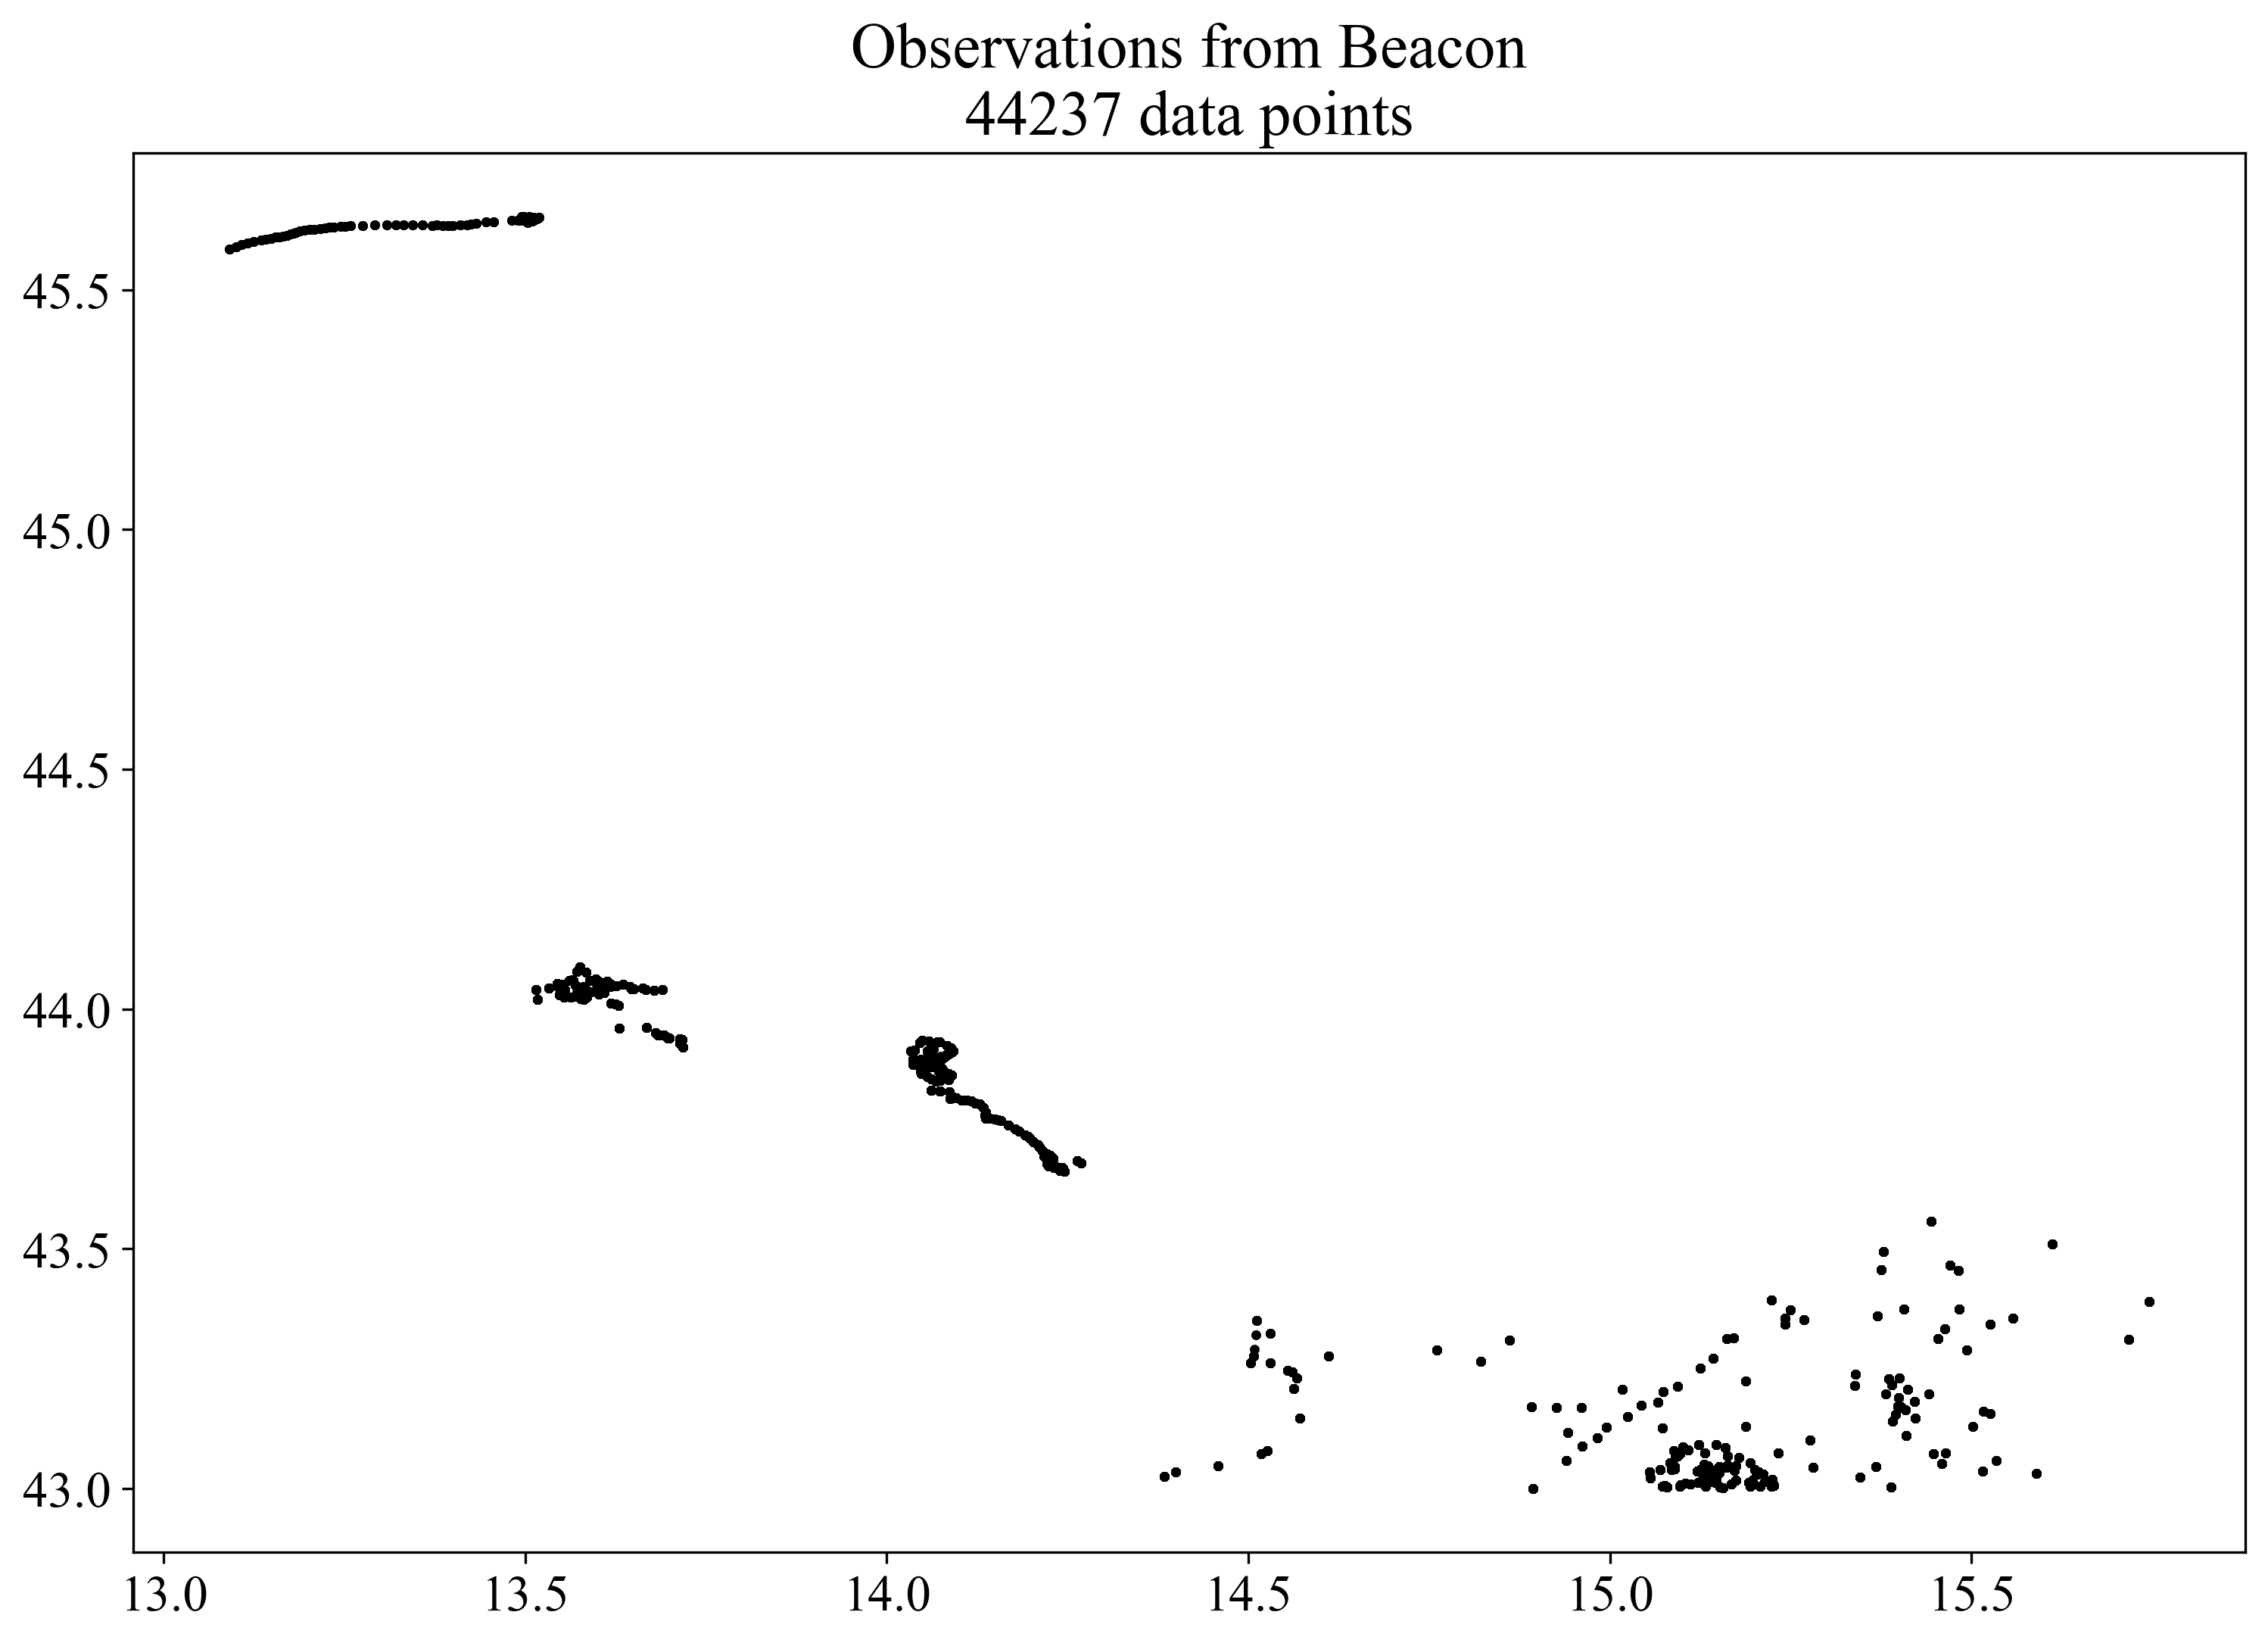

([15.083213333333333, 15.083213333333333, 15.083213333333333, 15.083213333333333, 15.083213333333333, 15.083213333333333, 15.083213333333333, 15.083213333333333, 15.083213333333333, 15.083213333333333  …  15.066143333333333, 15.066143333333333, 15.066143333333333, 15.066143333333333, 15.066143333333333, 15.066143333333333, 15.066143333333333, 15.066143333333333, 15.066143333333333, 15.066143333333333], [43.05365833333333, 43.05365833333333, 43.05365833333333, 43.05365833333333, 43.05365833333333, 43.05365833333333, 43.05365833333333, 43.05365833333333, 43.05365833333333, 43.05365833333333  …  43.179336666666664, 43.179336666666664, 43.179336666666664, 43.179336666666664, 43.179336666666664, 43.179336666666664, 43.179336666666664, 43.179336666666664, 43.179336666666664, 43.179336666666664], Float32[24.592, 24.591, 24.592, 24.603, 24.6, 24.6, 24.597, 24.599, 24.602, 24.596  …  13.274, 13.172, 13.097, 13.05, 12.841, 12.731, 12.807, 12.812, 22.931, 22.942], Float32[38.867, 38.87, 38.869, 3

In [29]:
lon2, lat2, T2, S2 = plot_data_argo(datafile2, "Observations from Beacon")

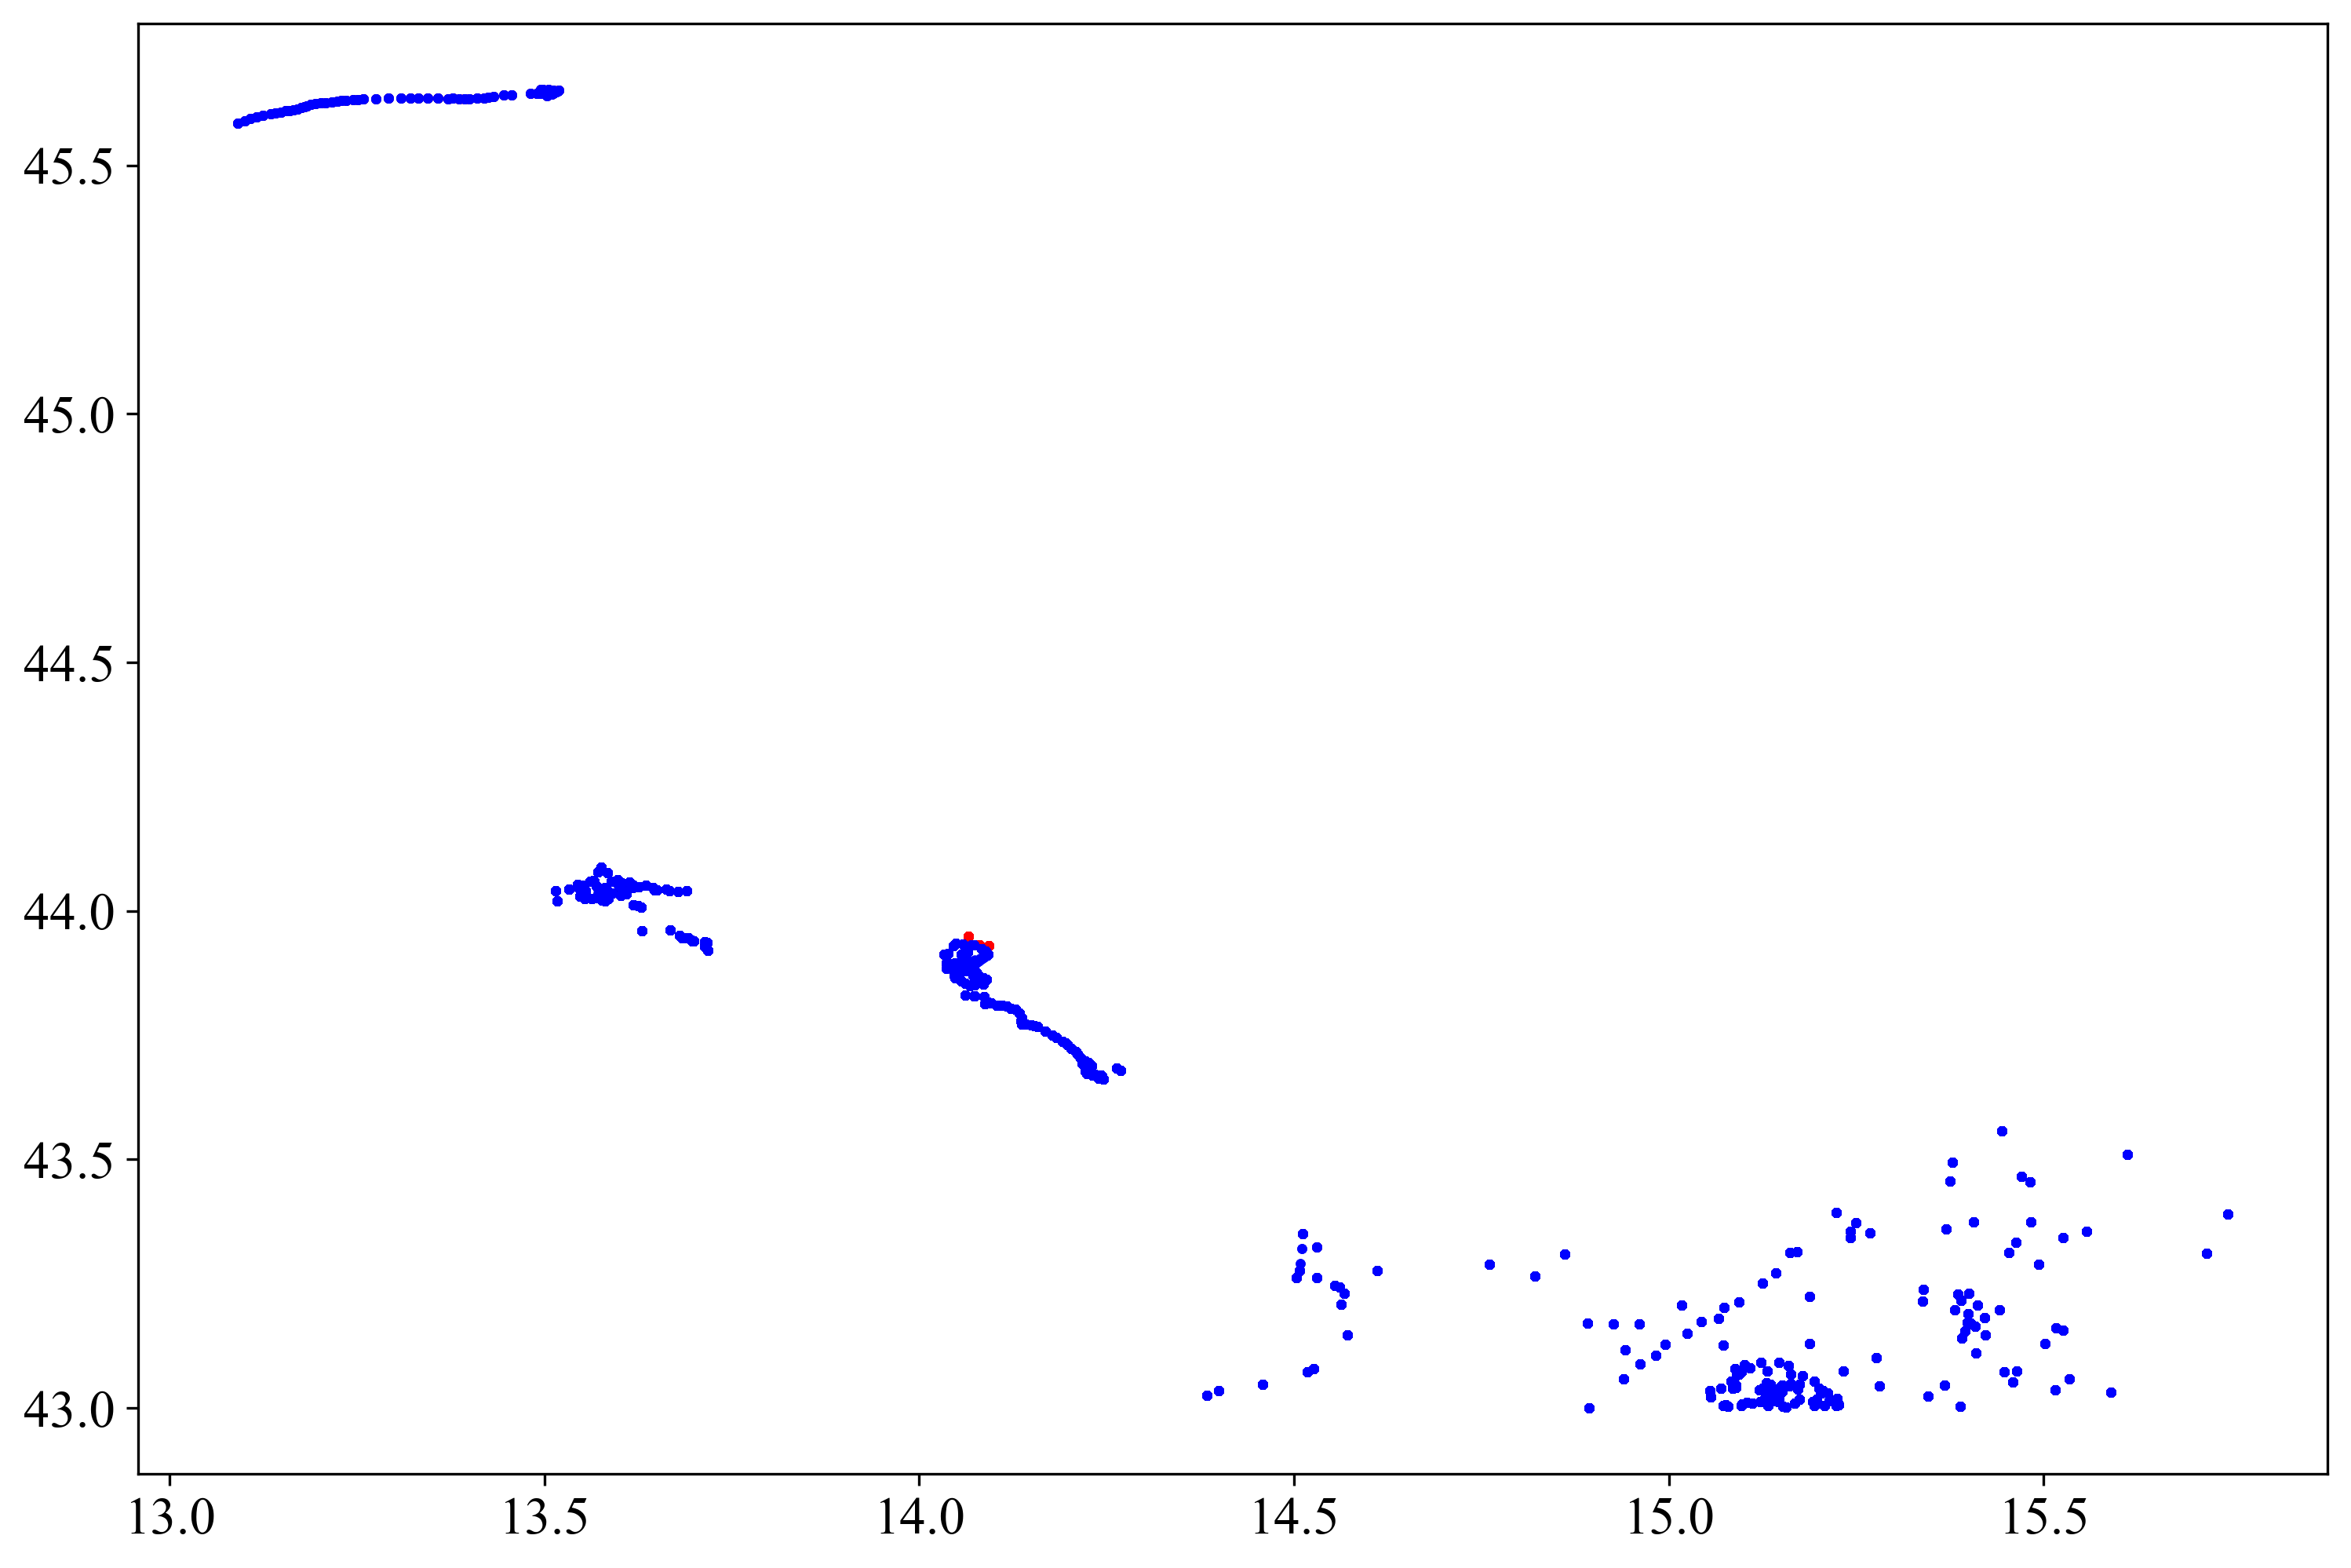

In [26]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(lon1, lat1, "ro", ms=2, zorder=2)
ax.plot(lon2, lat2, "bo", ms=2)
plt.show()

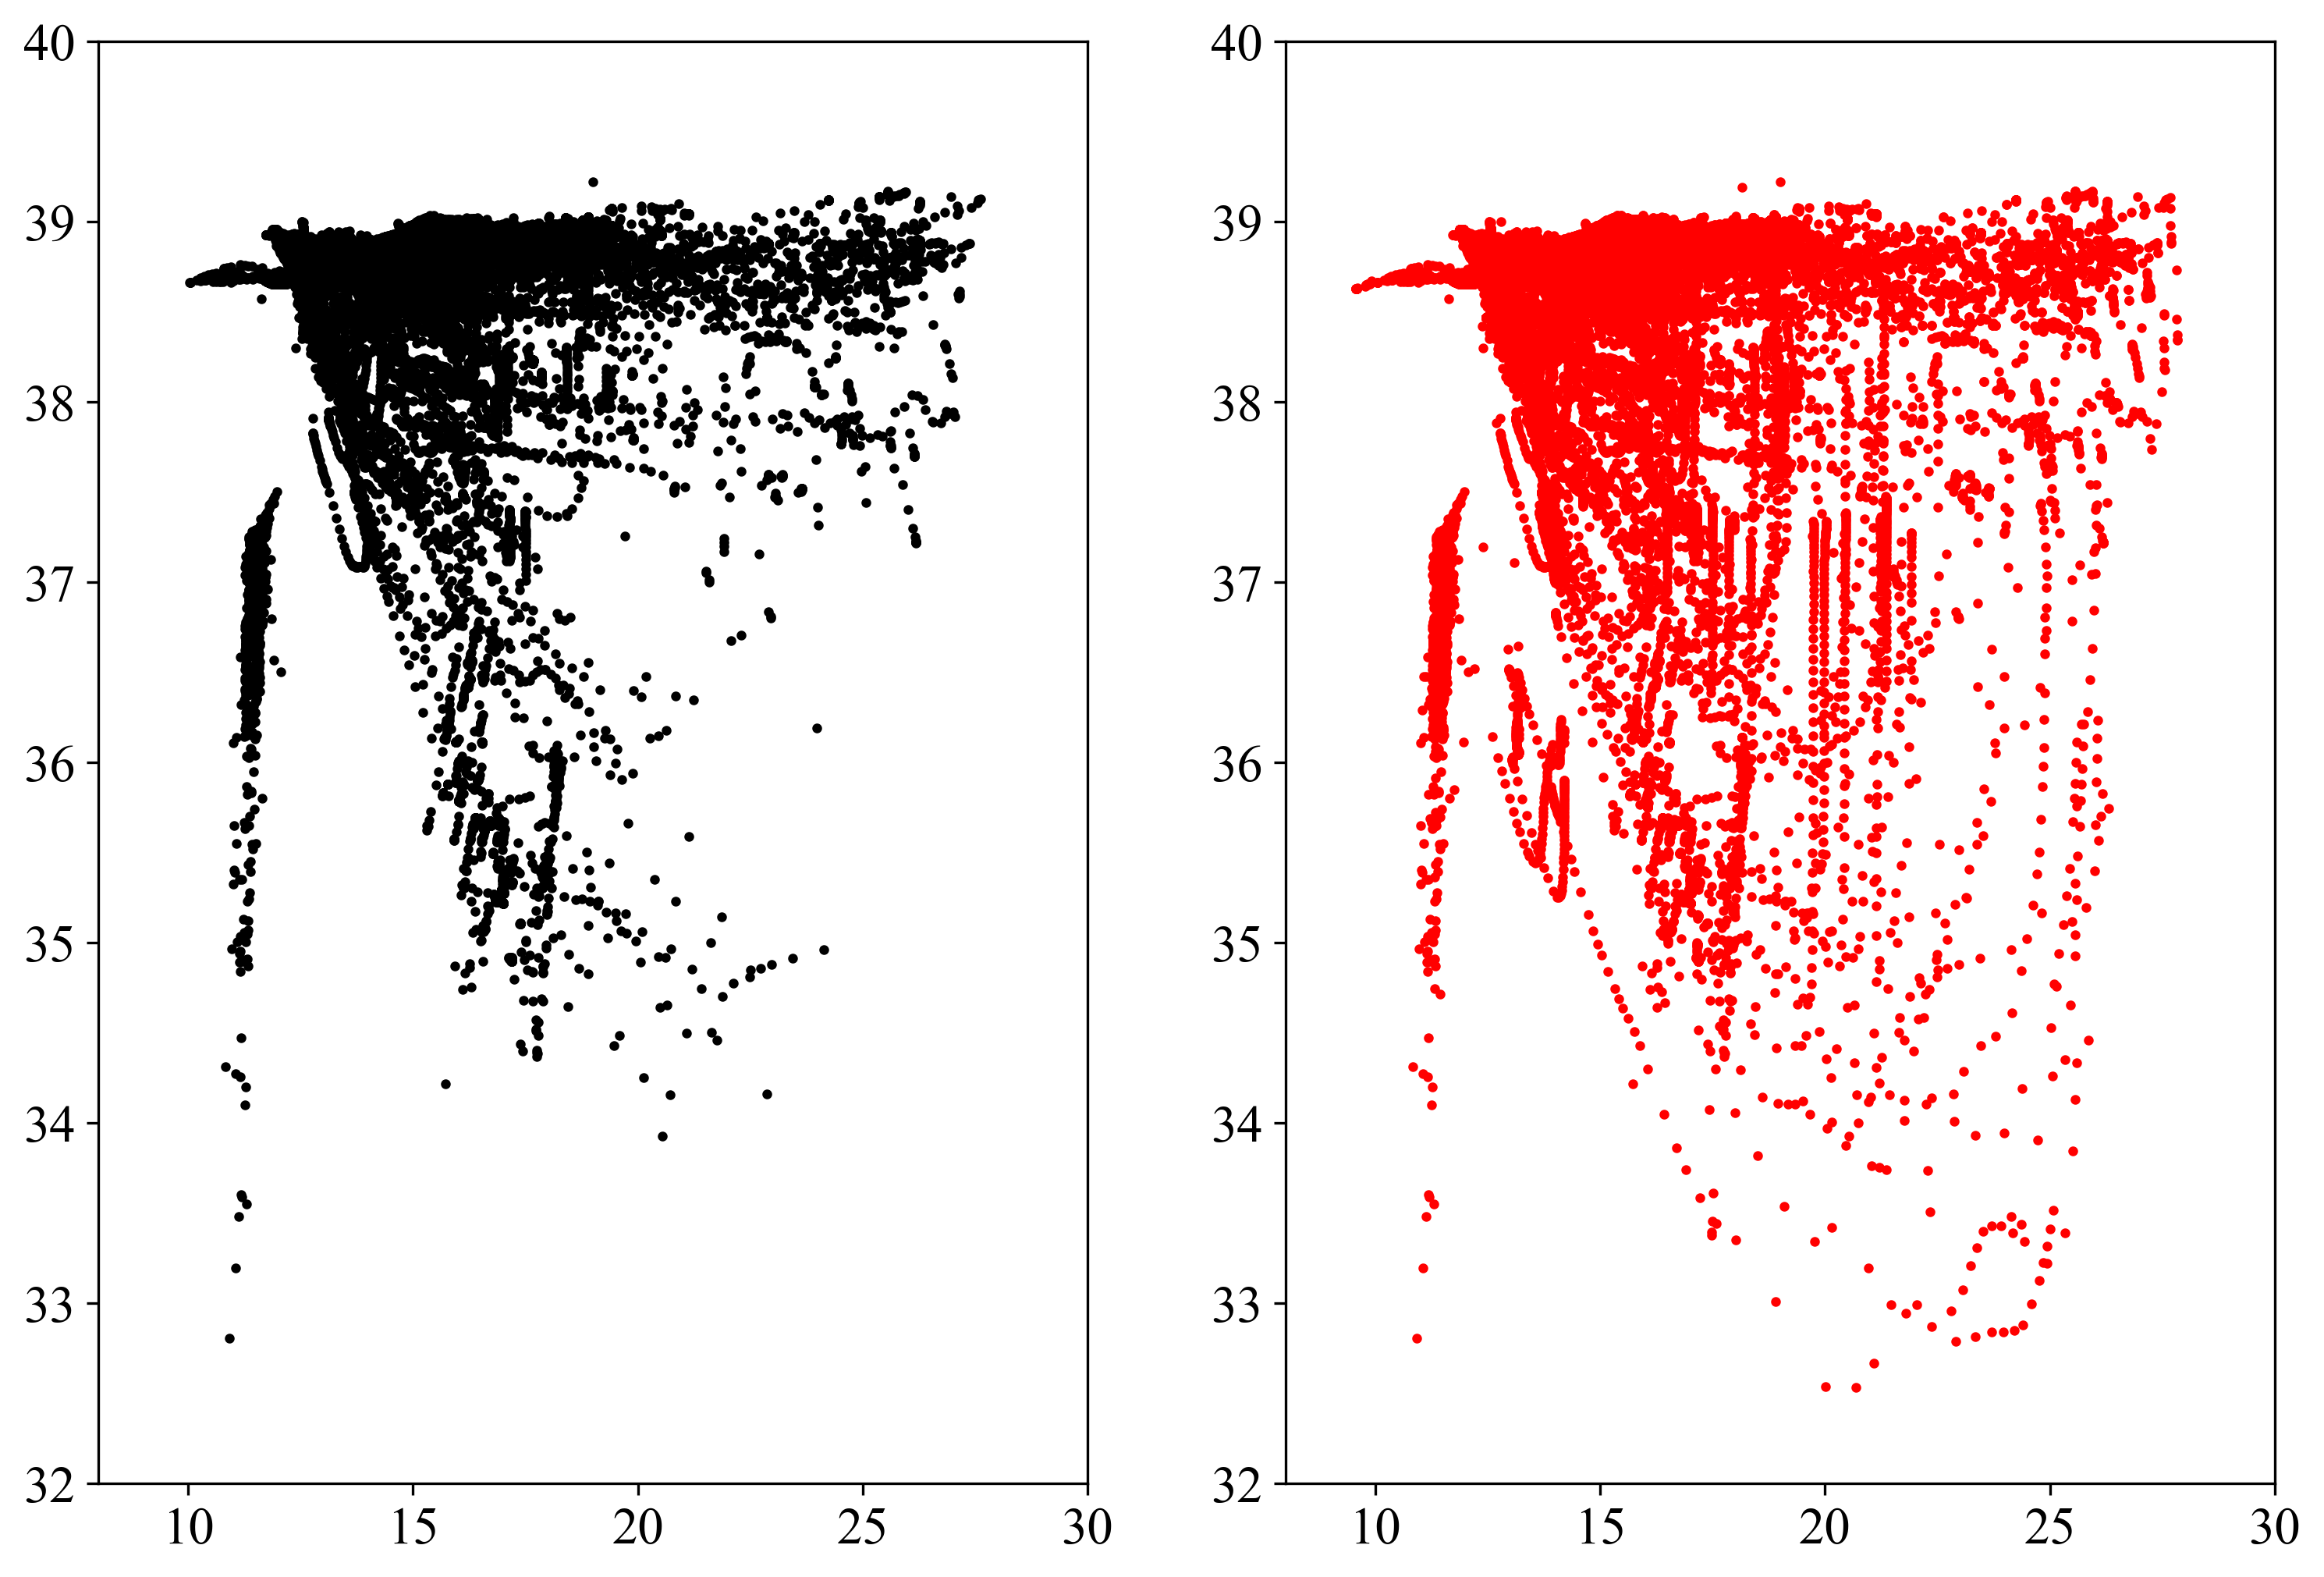

(32.0, 40.0)

In [42]:
fig = plt.figure()
ax1 = plt.subplot(121)
ax1.plot(T1, S1, "ko", ms=2, zorder=2)
ax1.set_xlim(8., 30.)
ax1.set_ylim(32., 40.)

ax2 = plt.subplot(122)
ax2.plot(T2, S2, "ro", ms=2)
ax2.set_xlim(8., 30.)
ax2.set_ylim(32., 40.)